About Dataset
Content
This "Plant Growth Data Classification" dataset, the prediction task would typically involve predicting or classifying the growth milestone of plants based on the provided environmental and management factors. Specifically, you would aim to predict the growth stage or milestone that a plant reaches based on variables such as soil type, sunlight hours, water frequency, fertilizer type, temperature, and humidity. This prediction can help in understanding how different conditions influence plant growth and can be valuable for optimizing agricultural practices or greenhouse management.

Here about the description of the columns


<ul>
  <li><strong>Soil_Type</strong>: The type or composition of soil in which the plants are grown.</li>
  <li><strong>Sunlight_Hours</strong>: The duration or intensity of sunlight exposure received by the plants.</li>
  <li><strong>Water_Frequency</strong>: How often the plants are watered, indicating the watering schedule.</li>
  <li><strong>Fertilizer_Type</strong>: The type of fertilizer used for nourishing the plants.</li>
  <li><strong>Temperature</strong>: The ambient temperature conditions under which the plants are grown.</li>
  <li><strong>Humidity</strong>: The level of moisture or humidity in the environment surrounding the plants.</li>
  <li><strong>Growth_Milestone</strong>: Descriptions or markers indicating stages or significant events in the growth process of the plants.</li>
</ul>


In [472]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot  as plt 
%matplotlib inline

import seaborn as sns 
import scipy as py 
# import sweetviz as sv
from ydata_profiling import ProfileReport


import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential  

from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from mlxtend.plotting import plot_decision_regions

# from keras_tuner import RandomSearch


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping

In [473]:

plantGrowth_predict = pd.read_csv('plant_growth_data.csv')
plantGrowth_predict.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [474]:
# Generate the profile report
profile = ProfileReport(plantGrowth_predict, title="Pandas Profiling Report", explorative=True)

# To view the report in your browser
profile.to_file("report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [475]:
print(plantGrowth_predict.columns)

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')


In [476]:
plantGrowth_predict.shape

(193, 7)

In [477]:
plantGrowth_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [478]:
no_values = plantGrowth_predict.isnull().sum()
print(f"here we printing the no values {no_values}")

here we printing the no values Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64


In [479]:
duplicated = plantGrowth_predict.duplicated().sum()
print(f"The total duplicted value  : {duplicated}")

The total duplicted value  : 0


In [480]:
plantGrowth_predict.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [481]:
plantGrowth_predict.describe().corr()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
Sunlight_Hours,1.000000,0.993884,0.934965,0.999370
Temperature,0.993884,1.000000,0.968242,0.989348
Humidity,0.934965,0.968242,1.000000,0.921911
Growth_Milestone,0.999370,0.989348,0.921911,1.000000


In [482]:
plantGrowth_predict.head(5)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


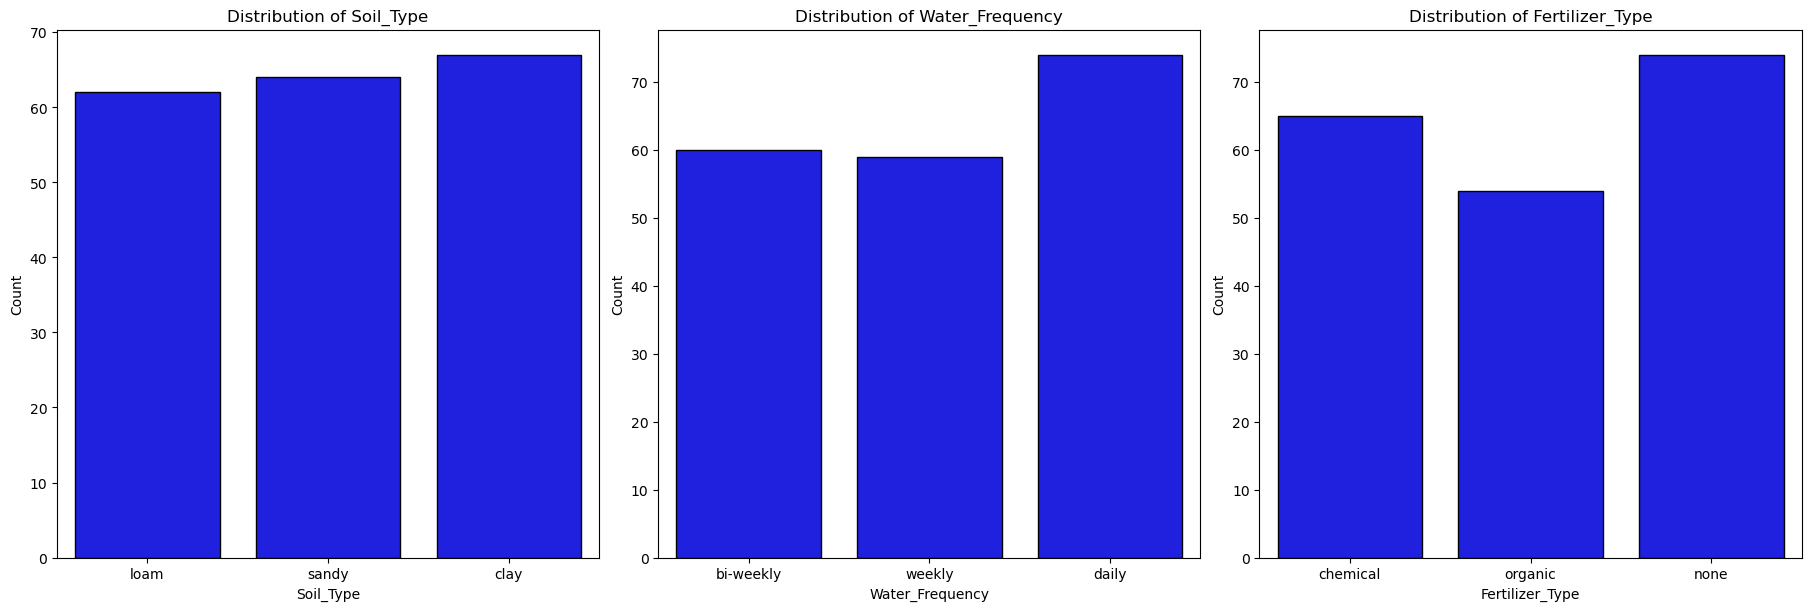

In [483]:
# List of columns to plot
categorical_columns = [
 'Soil_Type', 'Water_Frequency','Fertilizer_Type',
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.countplot(data=plantGrowth_predict, x=column, edgecolor='black',color = 'b', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

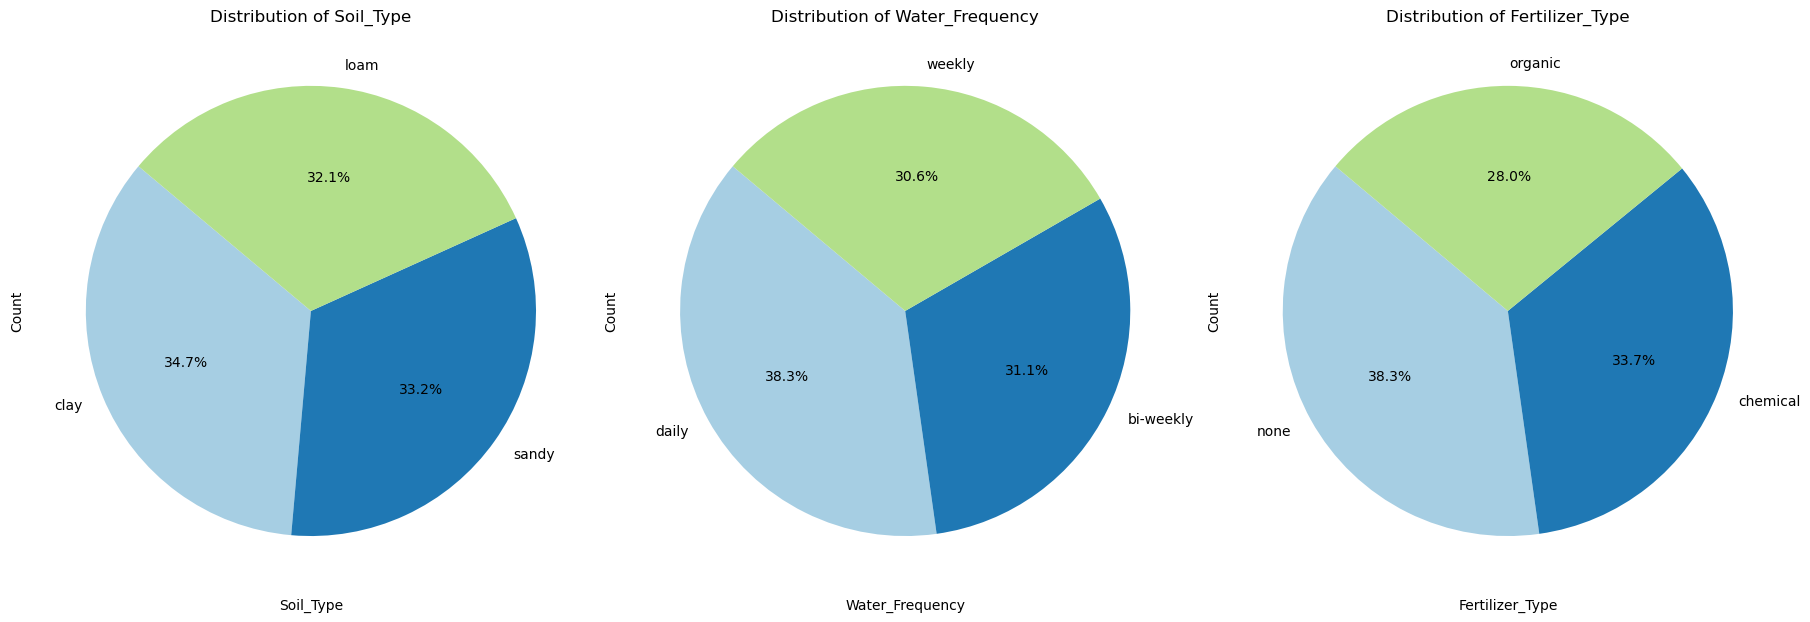

In [484]:
categorical_columns = [
 'Soil_Type', 'Water_Frequency','Fertilizer_Type',
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    # Ensure the column is treated as a categorical variable
    value_counts = plantGrowth_predict[column].value_counts()
    
    # Plot pie chart
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(value_counts))))
    axes[i].set_title(f'Distribution of {column}')
    # #  axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count') 

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):                                                                                            
    fig.delaxes(axes[j])

plt.show() 

In [485]:
plantGrowth_predict.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


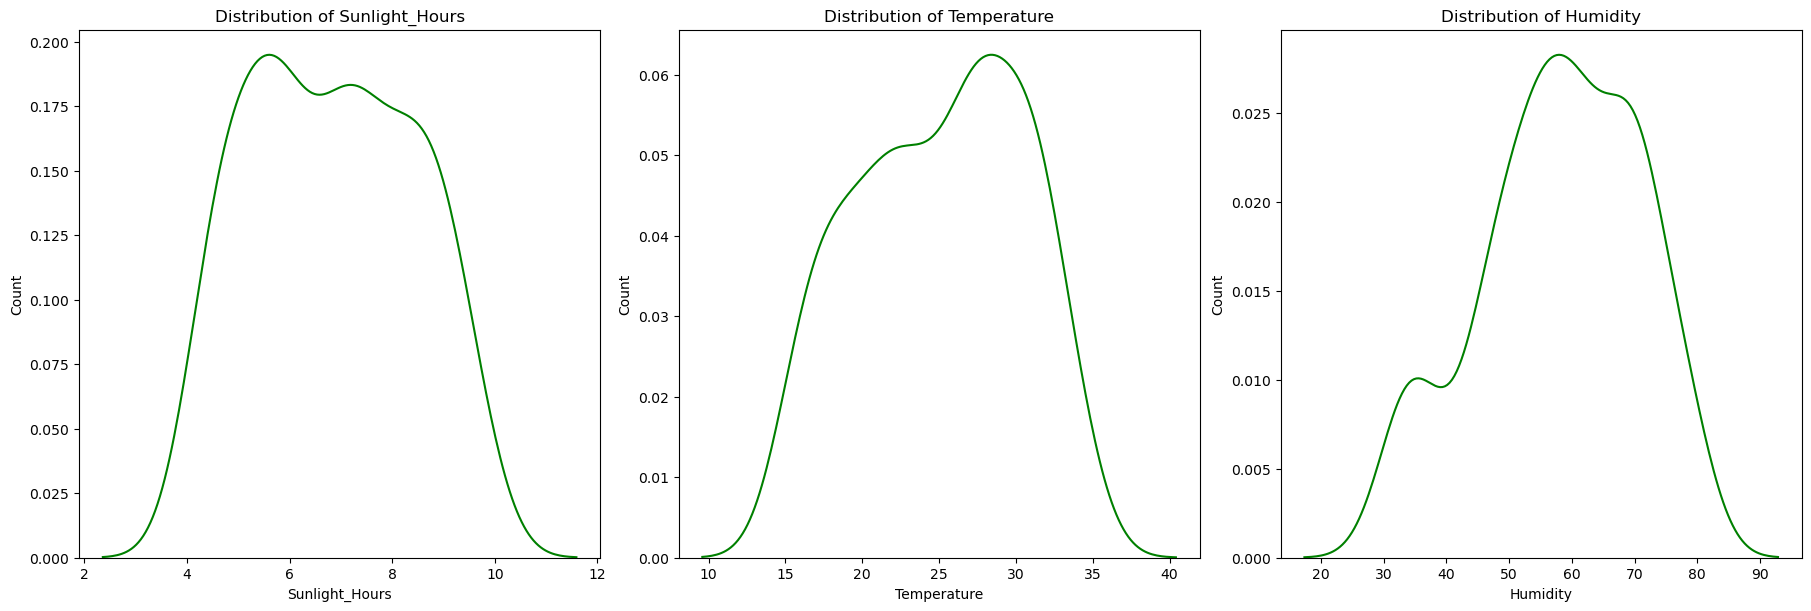

In [486]:
# List of columns to plot
# here in data sets data distibution not good 
categorical_columns = [
 'Sunlight_Hours', 'Temperature','Humidity'
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.kdeplot(data=plantGrowth_predict, x=column,color = 'g', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

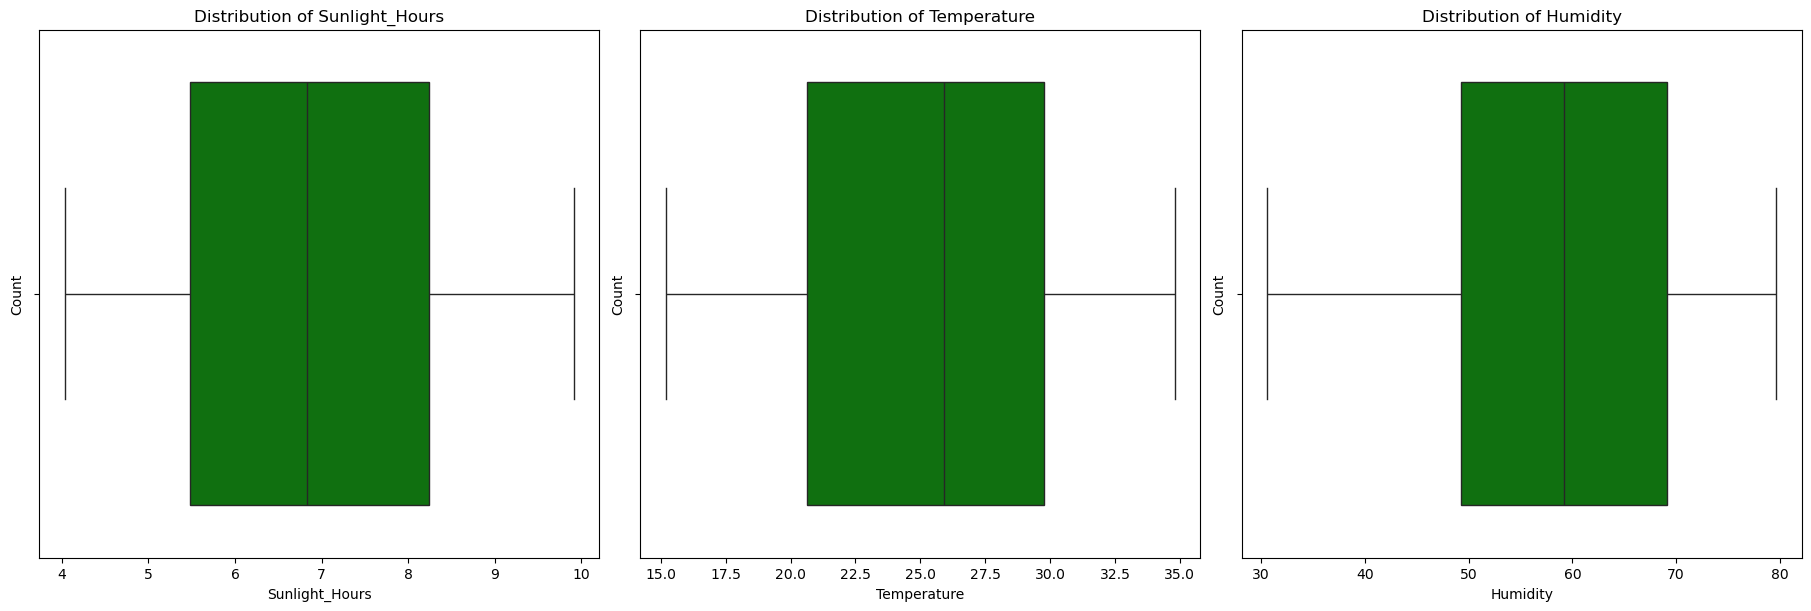

In [487]:
# List of columns to plot
# here in this we have  the outlies in the given datasets
categorical_columns = [
 'Sunlight_Hours', 'Temperature','Humidity'
    
]

# Number of columns for subplots
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(categorical_columns):
    sns.boxplot(data=plantGrowth_predict, x=column,color = 'g', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)  # Remove x-axis label
    axes[i].set_ylabel('Count')  # Add y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


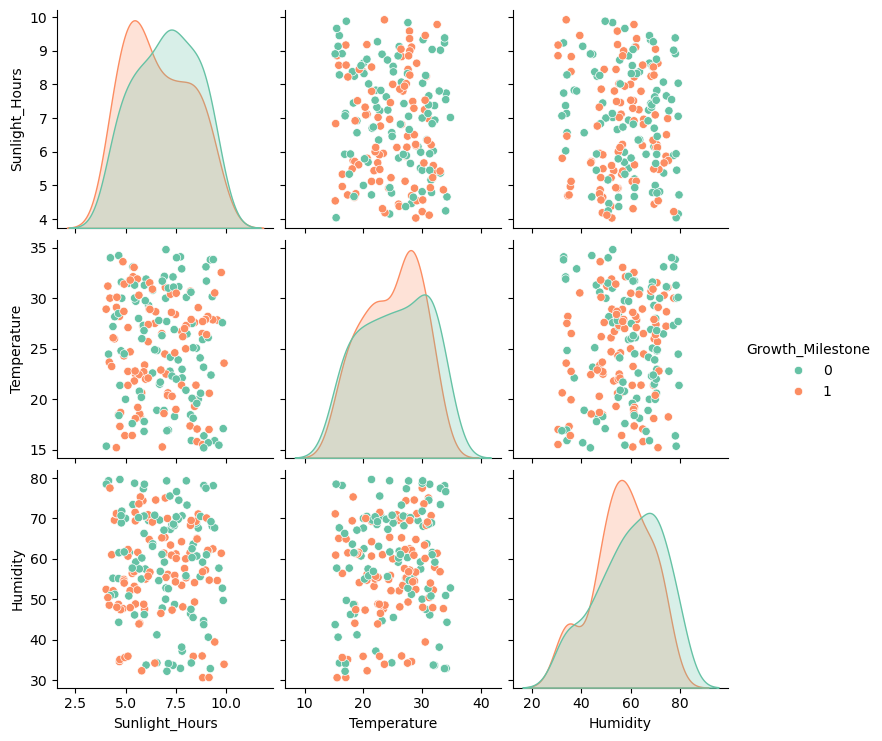

In [488]:
# fist we applying the pair polt
sns.pairplot(plantGrowth_predict,hue = 'Growth_Milestone',palette='Set2')
plt.show()

In [489]:
correlation_matrix =plantGrowth_predict.describe().corr()
correlation_matrix

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
Sunlight_Hours,1.000000,0.993884,0.934965,0.999370
Temperature,0.993884,1.000000,0.968242,0.989348
Humidity,0.934965,0.968242,1.000000,0.921911
Growth_Milestone,0.999370,0.989348,0.921911,1.000000


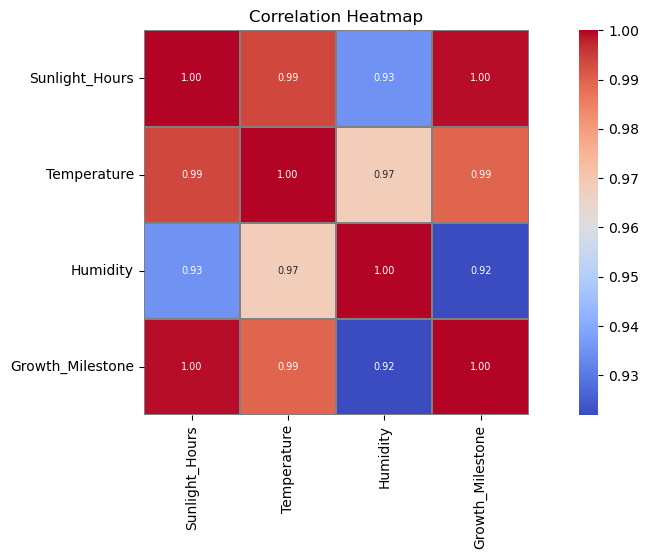

In [490]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True,linewidths=0.3,linecolor='gray',annot_kws={"size": 7},fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

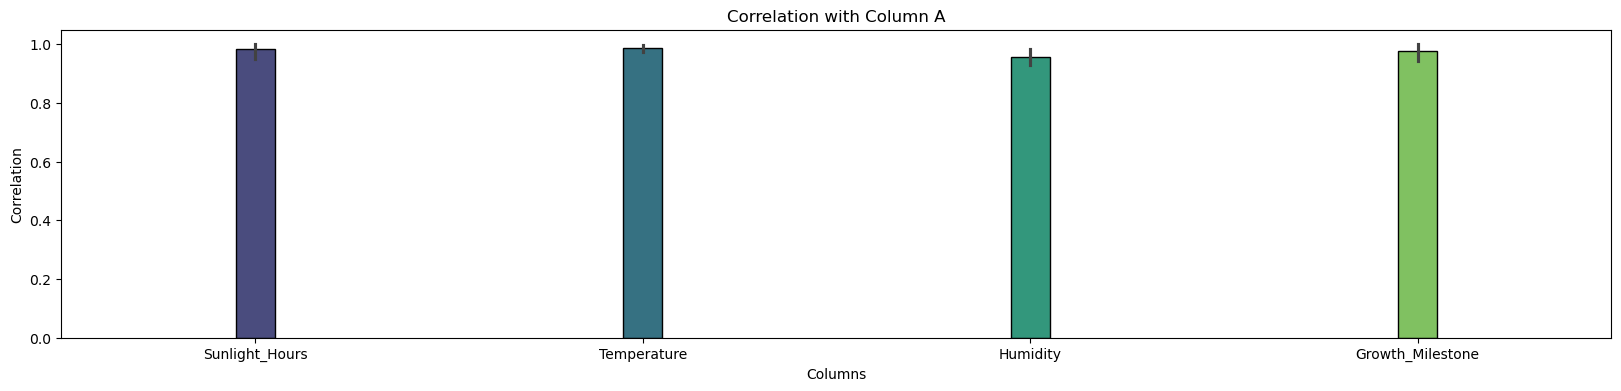

In [491]:
plt.figure(figsize=(20, 4))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=1,width=0.1)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    
plt.show()

In [492]:
plantGrowth_predict.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [493]:
plantGrowth_predict.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [494]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # drop='first' to avoid multicollinearity
plantGrowth_predict['Soil_Type'] = encoder.fit_transform(plantGrowth_predict[['Soil_Type']])
plantGrowth_predict['Water_Frequency'] = encoder.fit_transform(plantGrowth_predict[['Water_Frequency']])
plantGrowth_predict['Fertilizer_Type'] = encoder.fit_transform(plantGrowth_predict[['Fertilizer_Type']])





In [495]:
# # Initialize the MinMaxScaler
# scaler = StandardScaler()


from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
plantGrowth_predict['Sunlight_Hours'] = scaler.fit_transform(plantGrowth_predict[['Sunlight_Hours']])
plantGrowth_predict['Temperature'] = scaler.fit_transform(plantGrowth_predict[['Temperature']])
plantGrowth_predict['Humidity'] = scaler.fit_transform(plantGrowth_predict[['Humidity']])



In [496]:
plantGrowth_predict.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1.0,-0.593672,0.0,0.0,0.636703,0.121669,0
1,0.0,-1.013029,0.0,0.0,0.329701,-0.341441,1
2,1.0,0.745069,0.0,1.0,-0.299674,-0.733448,0
3,1.0,0.509327,0.0,1.0,-0.816421,-0.643918,0
4,0.0,0.557407,0.0,0.0,-0.853385,0.224400,0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22480\1091159610.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=plantGrowth_predict[column], shade=True, color='blue', ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22480\1091159610.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=plantGrowth_predict[column], shade=True, color='blue', ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22480\1091159610.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=plantGrowth_predict[column], shade=True, color='blue', ax=axes[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22480\1091159610.py:15: Future

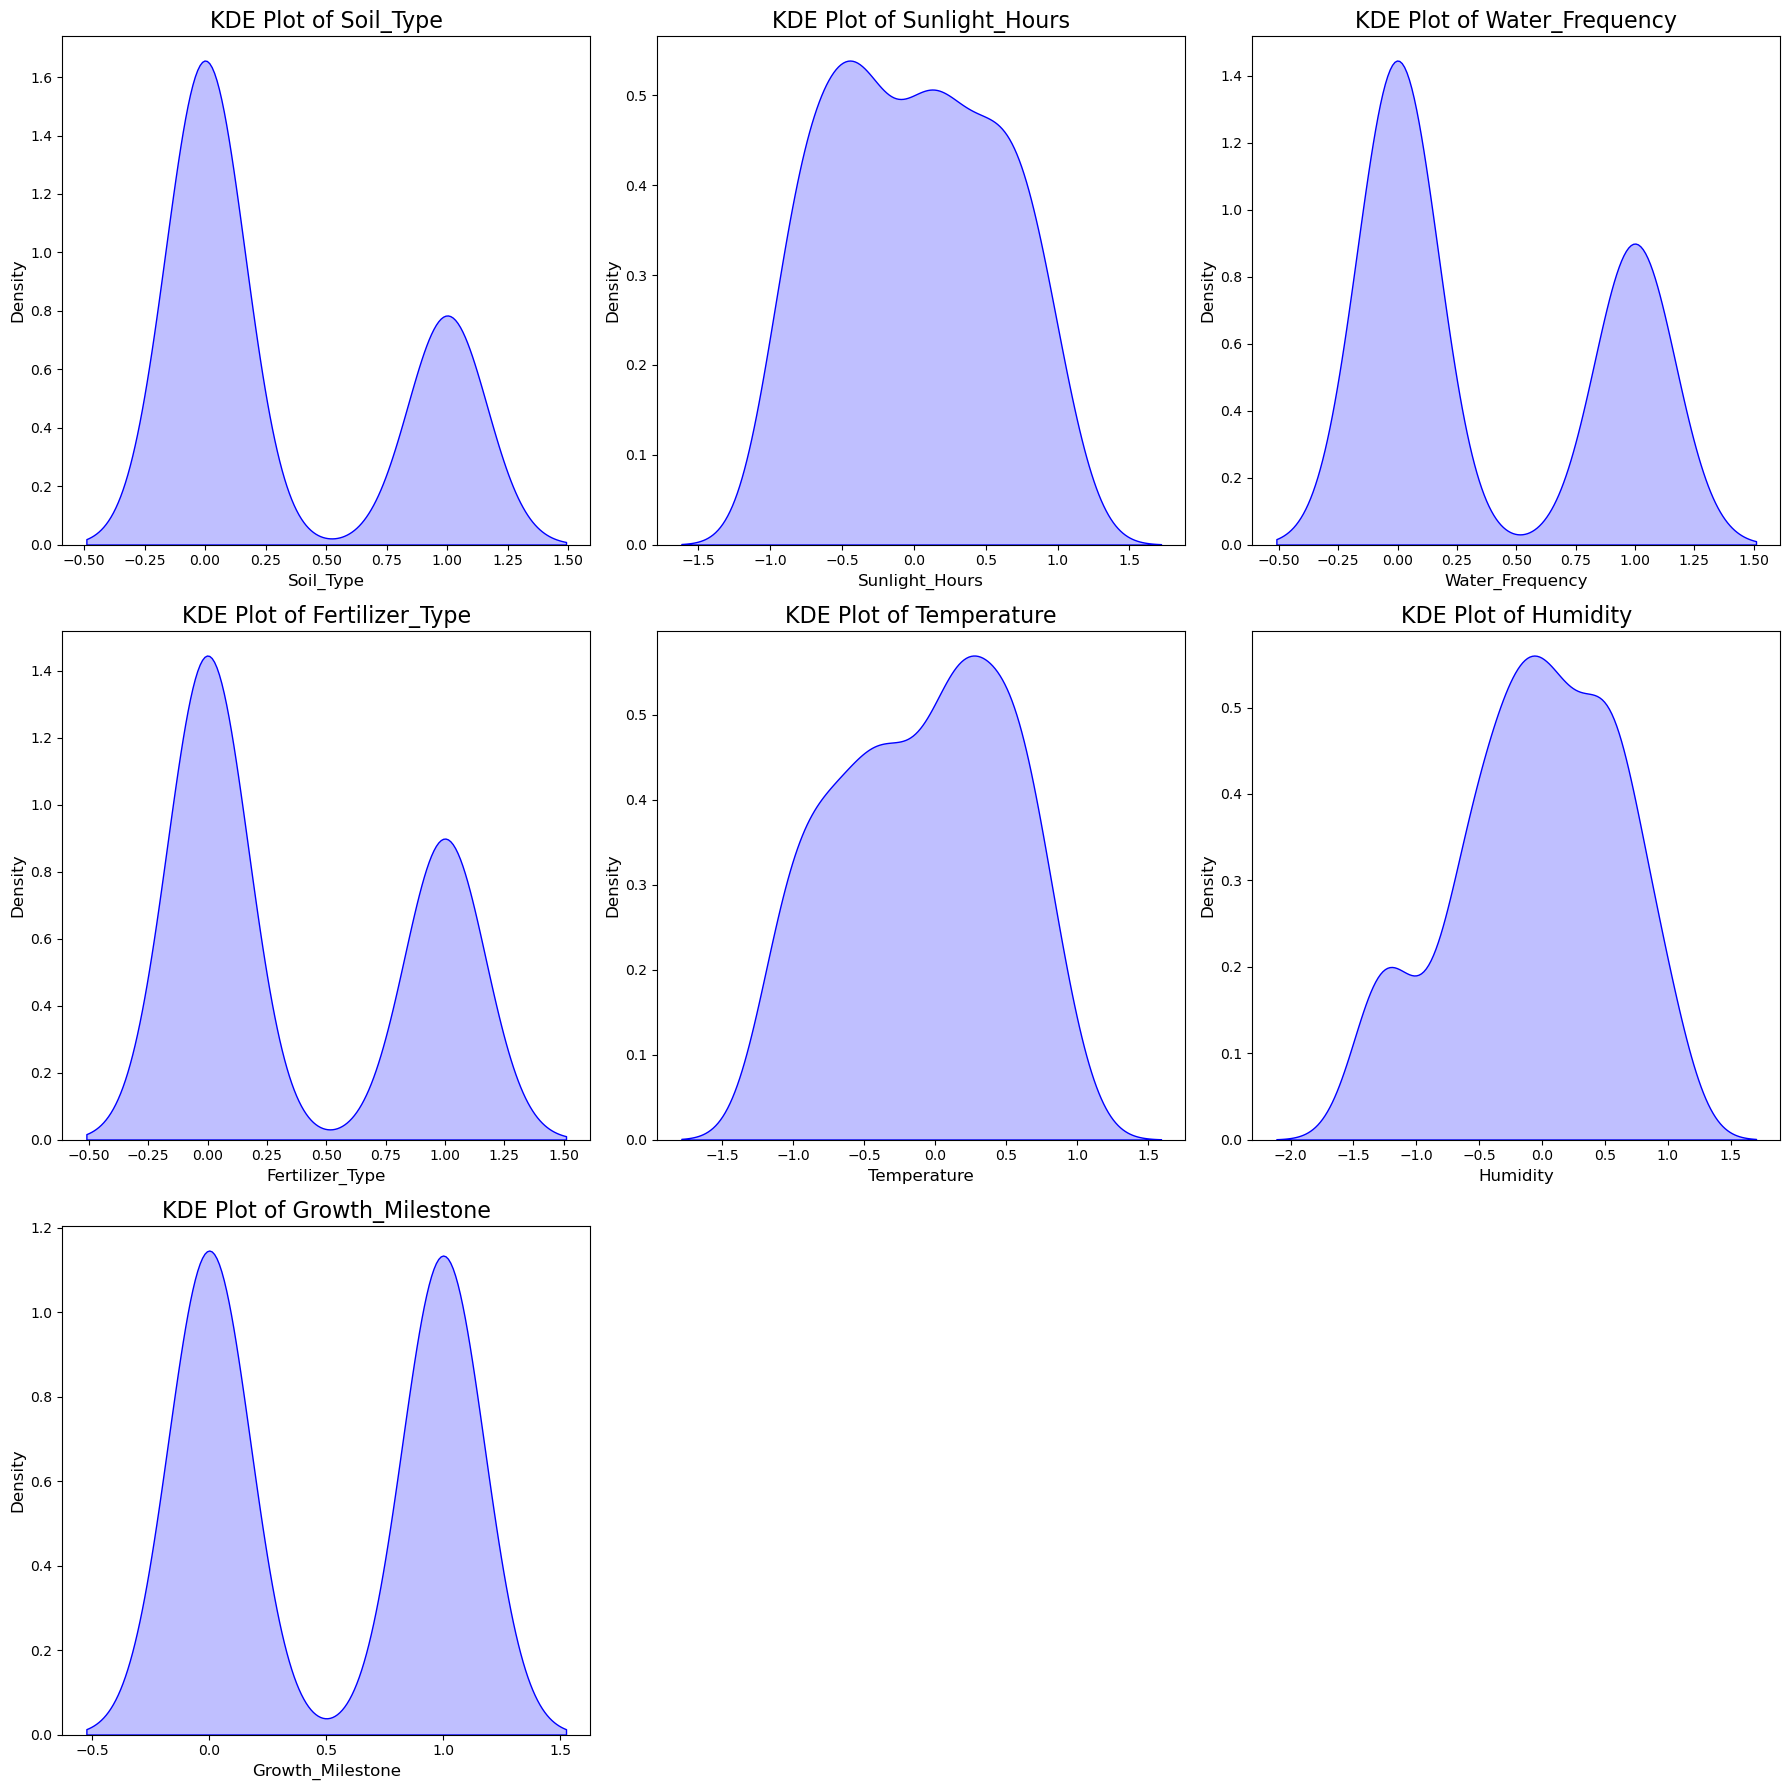

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of columns in the DataFrame
num_columns = len(plantGrowth_predict.columns)

# Create subplots with a number of rows and columns
fig, axes = plt.subplots(nrows=(num_columns + 2) // 3, ncols=3, figsize=(18, 6 * ((num_columns + 2) // 3)))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot KDE for each column
for i, column in enumerate(plantGrowth_predict.columns):
    sns.kdeplot(data=plantGrowth_predict[column], shade=True, color='blue', ax=axes[i])
    axes[i].set_title(f'KDE Plot of {column}', fontsize=16)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [498]:
plantGrowth_predict.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1.0,-0.593672,0.0,0.0,0.636703,0.121669,0
1,0.0,-1.013029,0.0,0.0,0.329701,-0.341441,1
2,1.0,0.745069,0.0,1.0,-0.299674,-0.733448,0
3,1.0,0.509327,0.0,1.0,-0.816421,-0.643918,0
4,0.0,0.557407,0.0,0.0,-0.853385,0.224400,0


In [499]:
x = plantGrowth_predict.drop(columns='Growth_Milestone')
y = plantGrowth_predict['Growth_Milestone']

In [500]:
x.head(4)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
0,1.0,-0.593672,0.0,0.0,0.636703,0.121669
1,0.0,-1.013029,0.0,0.0,0.329701,-0.341441
2,1.0,0.745069,0.0,1.0,-0.299674,-0.733448
3,1.0,0.509327,0.0,1.0,-0.816421,-0.643918


In [501]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [502]:
x_train.shape 

(135, 6)

In [503]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # or 'val_accuracy' if you prefer
    patience=10,          # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Print messages when stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [504]:
# Initialize the ANN
model = Sequential()

# Add input layer and the first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=6,kernel_regularizer=tf.keras.regularizers.l1(0.001)))
# model.kernel_regularizer=regularizers.l2(0.01)
model.add(Dropout(0.2))

# Add a second hidden layer
model.add(Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))

# Add Dropout to prevent overfitting
model.add(Dropout(0.2))
# Add a second hidden layer
model.add(Dense(units=33, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))

# Add Dropout to prevent overfitting
model.add(Dropout(0.2))


# Add output layer (assuming binary classification)
model.add(Dense(units=1, activation='sigmoid'))


x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [505]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 33)             │         2,145 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,331 (44.26 KB)

 Trainable params: 11,331 (44.26 KB)

 Non-trainable params: 0 (0.00 B)

In [506]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [507]:

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test),callbacks=[early_stopping],  # Add EarlyStopping callback here
    verbose=1
)



Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5334 - loss: 1.7475 - val_accuracy: 0.5000 - val_loss: 1.7136
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5193 - loss: 1.6997 - val_accuracy: 0.4655 - val_loss: 1.6828
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5803 - loss: 1.6634 - val_accuracy: 0.5690 - val_loss: 1.6515
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5935 - loss: 1.6352 - val_accuracy: 0.5690 - val_loss: 1.6217
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6127 - loss: 1.6062 - val_accuracy: 0.5517 - val_loss: 1.5933
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6698 - loss: 1.5637 - val_accuracy: 0.5517 - val_loss: 1.5656
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6861 - loss: 1.5380 - val_accuracy: 0.5172 - val_loss: 1.5386
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6727 - loss: 1.5142 - val_accuracy: 0.5172 - val_loss: 1.5113
Epoc

In [508]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5679 - loss: 0.9347 
Test Loss: 0.9215
Test Accuracy: 58.62%


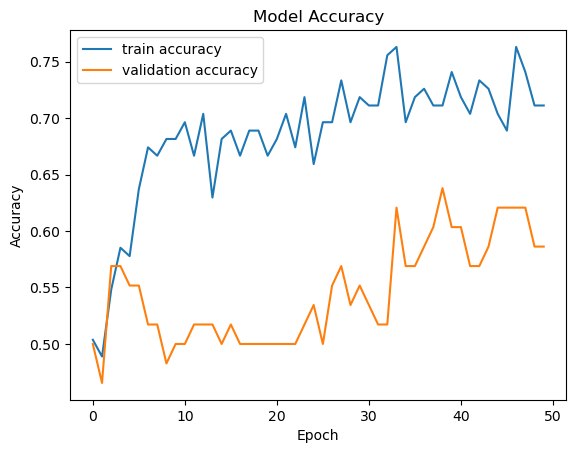

In [509]:

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

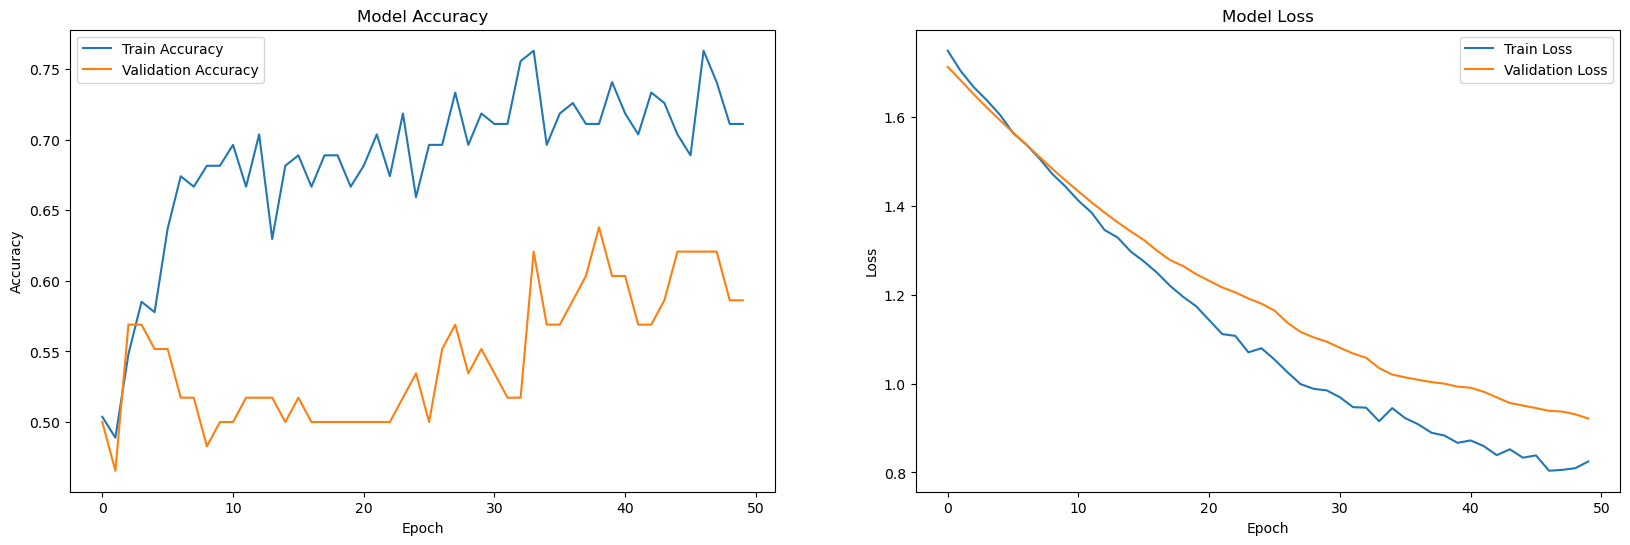

In [510]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [517]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels if binary classification

# Compute classification metrics
# print('Confusion Matrix:')
# print(confusion_matrix(y_test, y_pred_classes))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52        29
           1       0.57      0.72      0.64        29

    accuracy                           0.59        58
   macro avg       0.59      0.59      0.58        58
weighted avg       0.59      0.59      0.58        58

